In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_curve, auc
import umap
import matplotlib.pyplot as plt

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/umap-s0MDAZZ_-py3.8/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
change_df = pd.read_csv('../datasets/group_people.csv')
bots_df = pd.read_csv('../datasets/bots.csv')
users_df = pd.read_csv('../datasets/users.csv')
data = pd.concat([bots_df, users_df, change_df])
data = data.fillna(0)


source_features = ['has_photo','has_mobile','is_friend','can_post','can_see_all_posts',
            'can_see_audio','can_write_private_message','can_send_friend_request',
            'can_be_invited_group','followers_count','blacklisted','blacklisted_by_me',
            'is_favorite','is_hidden_from_feed','common_count','university','faculty',
            'graduation','relation','verified','deactivated','friend_status','can_access_closed',
            'is_closed', 'city_id','country_id','last_seen_platform','last_seen_time',
            'interests_bool', 'books_bool', 'tv_bool', 'quotes_bool', 'about_bool',
            'games_bool', 'movies_bool', 'activities_bool', 'music_bool', 'mobile_phone_bool',
            'home_phone_bool', 'site_bool', 'status_bool', 'university_bool',
            'university_name_bool', 'faculty_bool', 'faculty_name_bool', 'graduation_bool',
            'home_town_bool', 'relation_bool', 'personal_bool', 'universities_bool',
            'schools_bool', 'occupation_bool', 'education_form_bool', 'education_status_bool',
            'relation_partner_bool', 'skype_bool', 'twitter_bool', 'livejournal_bool',
            'instagram_bool', 'facebook_bool', 'facebook_name_bool', 'relatives_in_friends_bool',
            'change_nickname_bool', 'partner_in_friends_bool', 'partner_in_friends_bool',
            'posts_count', 'users_subscriptions_count', 'groups_subscriptions_count',
            'albums_count', 'audios_count', 'gifts_count', 'pages_count', 'photos_count',
            'subscriptions_count', 'videos_count', 'video_playlists_count', 'subscriptions_followers_coef',
            'subscriptions_followers_coef_norm', 'friends_count']


In [103]:
class Result:
    def __init__(self, selected_features_len, clf, accuracy, precision, recall, auc, f1, fpr, tpr):
        self.selected_features_len = selected_features_len
        self.clf = clf
        self.accuracy = accuracy
        self.precision = precision
        self.recall = recall
        self.auc = auc
        self.f1 = f1
        self.fpr = fpr
        self.tpr = tpr
    
    @property
    def metrics_sum(self):
        return self.accuracy + self.precision + self.recall + self.auc + self.f1

In [104]:
X, y = data[source_features], data[["bots"]].values.flatten()

clfs = [
    DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10),
    RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20),
    LogisticRegression(random_state=0, max_iter=1000, solver='saga'),
    svm.SVC(probability=True),
    MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000),
    GaussianNB(),
    AdaBoostClassifier(n_estimators=100, random_state=0),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
    HistGradientBoostingClassifier()
]
features_numbers = list(range(2, 7))
results = []
for features_number in features_numbers:
    for clf in clfs:
        # Разделение данных на train и test
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y)
        embed = umap.UMAP(
            n_neighbors=30,  # маленькое значение n_neighbors
            n_components=features_number,
        )

        Xtrain = embed.fit_transform(Xtrain)
        Xtest = embed.fit_transform(Xtest)
            
    
        clf.fit(Xtrain, Ytrain)
        y_pred_test = clf.predict(Xtest)
    
        # Вычисляем метрики
        test_accuracy = accuracy_score(y_pred_test, Ytest)
        test_precision = precision_score(y_pred_test, Ytest)
        test_recall = recall_score(y_pred_test, Ytest)
        test_f1 = f1_score(y_pred_test, Ytest)

        y_pred_test = clf.predict(Xtest)
        y_true = Ytest
        fpr, tpr, thresholds = roc_curve(y_true, y_pred_test)
        test_auc = auc(fpr, tpr)
            
        print(f"clf {clf.__class__.__name__}")
        print(f"F1 score: {test_f1}")
        print(f"Recall score: {test_recall}")
        print(f"Precision score: {test_precision}")
        print(f"Accuracy score: {test_accuracy}")
        print(f"Auc score: {test_auc}")

        result = Result(features_number, clf, test_accuracy, test_precision, test_recall, test_auc, test_f1, fpr, tpr)
        results.append(result)
    

n_components 2
n_components 2
clf DecisionTreeClassifier
F1 score: 0.5563636363636364
Recall score: 0.6815144766146993
Precision score: 0.4700460829493088
Accuracy score: 0.7827248441674087
Auc score: 0.6901954552677578
n_components 2
clf RandomForestClassifier
F1 score: 0.5229826353421859
Recall score: 0.7529411764705882
Precision score: 0.40062597809076683
Accuracy score: 0.7920747996438112
Auc score: 0.6741773325425832
n_components 2
clf LogisticRegression
F1 score: 0.0
Recall score: 0.0
Precision score: 0.0
Accuracy score: 0.680320569902048
Auc score: 0.47929736511919696
n_components 2
clf SVC
F1 score: 0.21497120921305182
Recall score: 0.2962962962962963
Precision score: 0.1686746987951807
Accuracy score: 0.6357969723953696
Auc score: 0.5002665529374133
n_components 2
clf MLPClassifier
F1 score: 0.5505154639175257
Recall score: 0.8929765886287625
Precision score: 0.3979135618479881
Accuracy score: 0.8058771148708815
Auc score: 0.6887980507652639
n_components 2
clf GaussianNB
F1 sc

clf GaussianNB
F1 score: 0.23214285714285715
Recall score: 0.8921568627450981
Precision score: 0.13343108504398826
Accuracy score: 0.7319679430097952
Auc score: 0.5631989184810733
n_components 6
clf AdaBoostClassifier
F1 score: 0.5027422303473491
Recall score: 0.6594724220623501
Precision score: 0.40620384047267355
Accuracy score: 0.7577916295636687
Auc score: 0.6578501675276052
n_components 6
clf GradientBoostingClassifier
F1 score: 0.2466091245376079
Recall score: 0.7692307692307693
Precision score: 0.14684287812041116
Accuracy score: 0.7279608192341941
Auc score: 0.5638367745234644
n_components 6
clf HistGradientBoostingClassifier
F1 score: 0.5914179104477612
Recall score: 0.7601918465227818
Precision score: 0.48396946564885496
Accuracy score: 0.804986642920748
Auc score: 0.7105579572116053


# Plot graphs of metrics

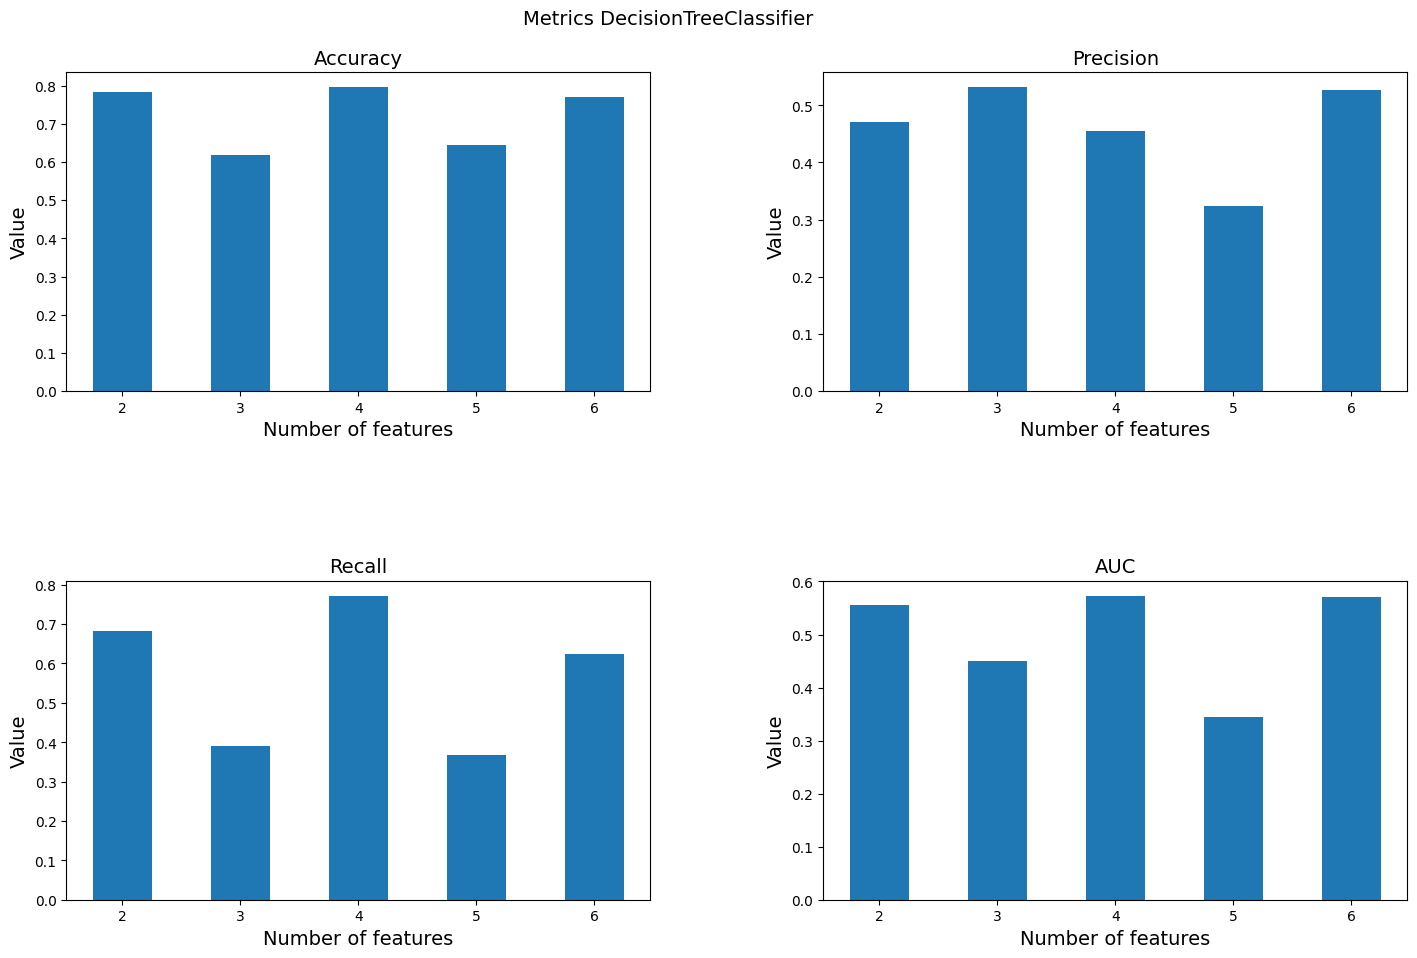

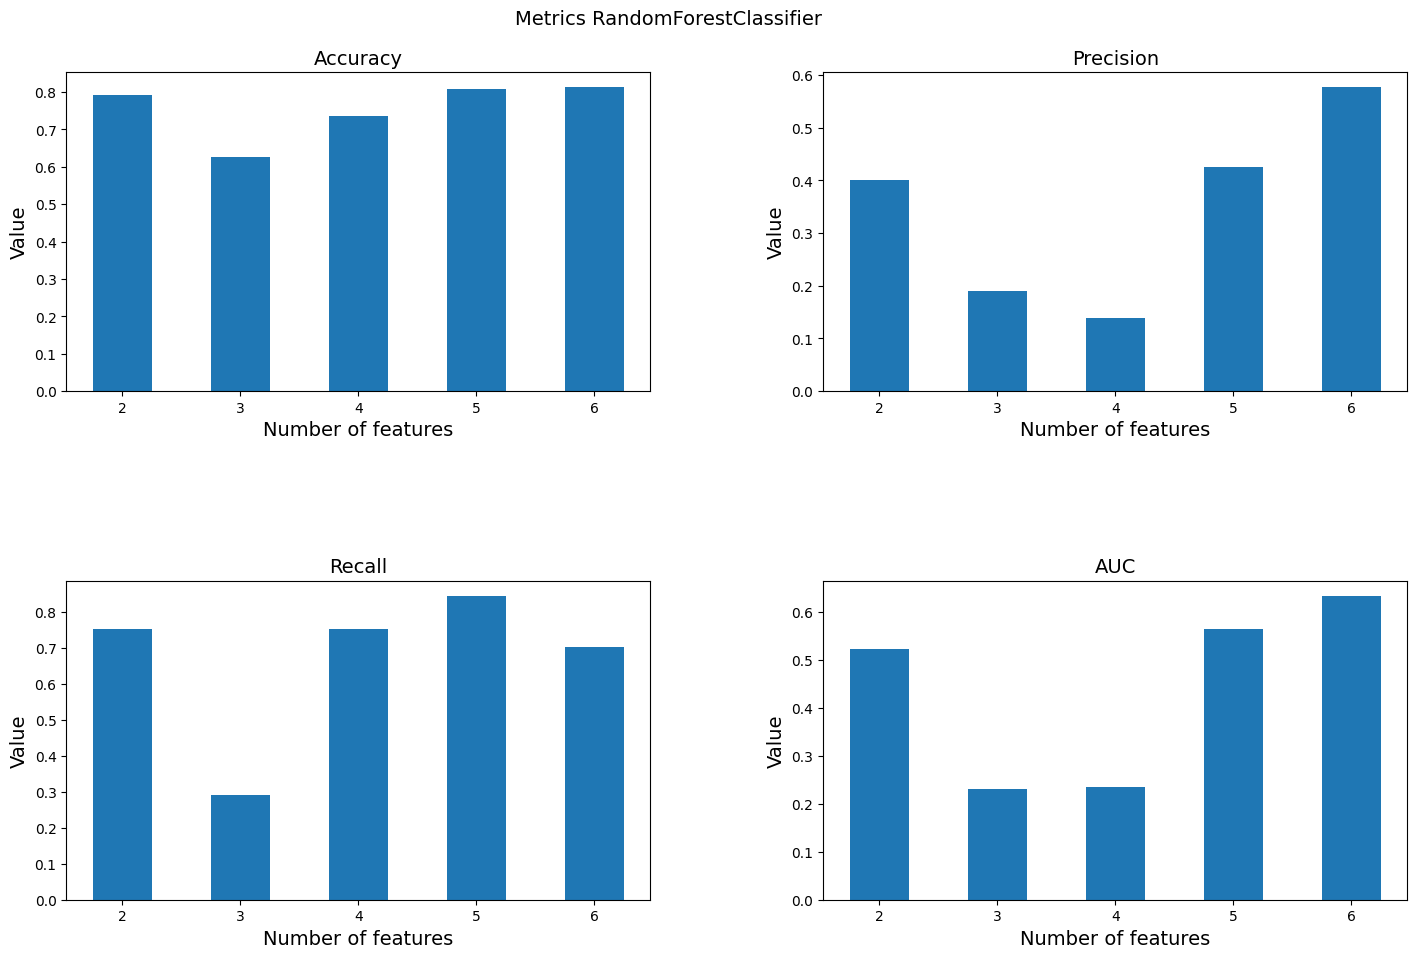

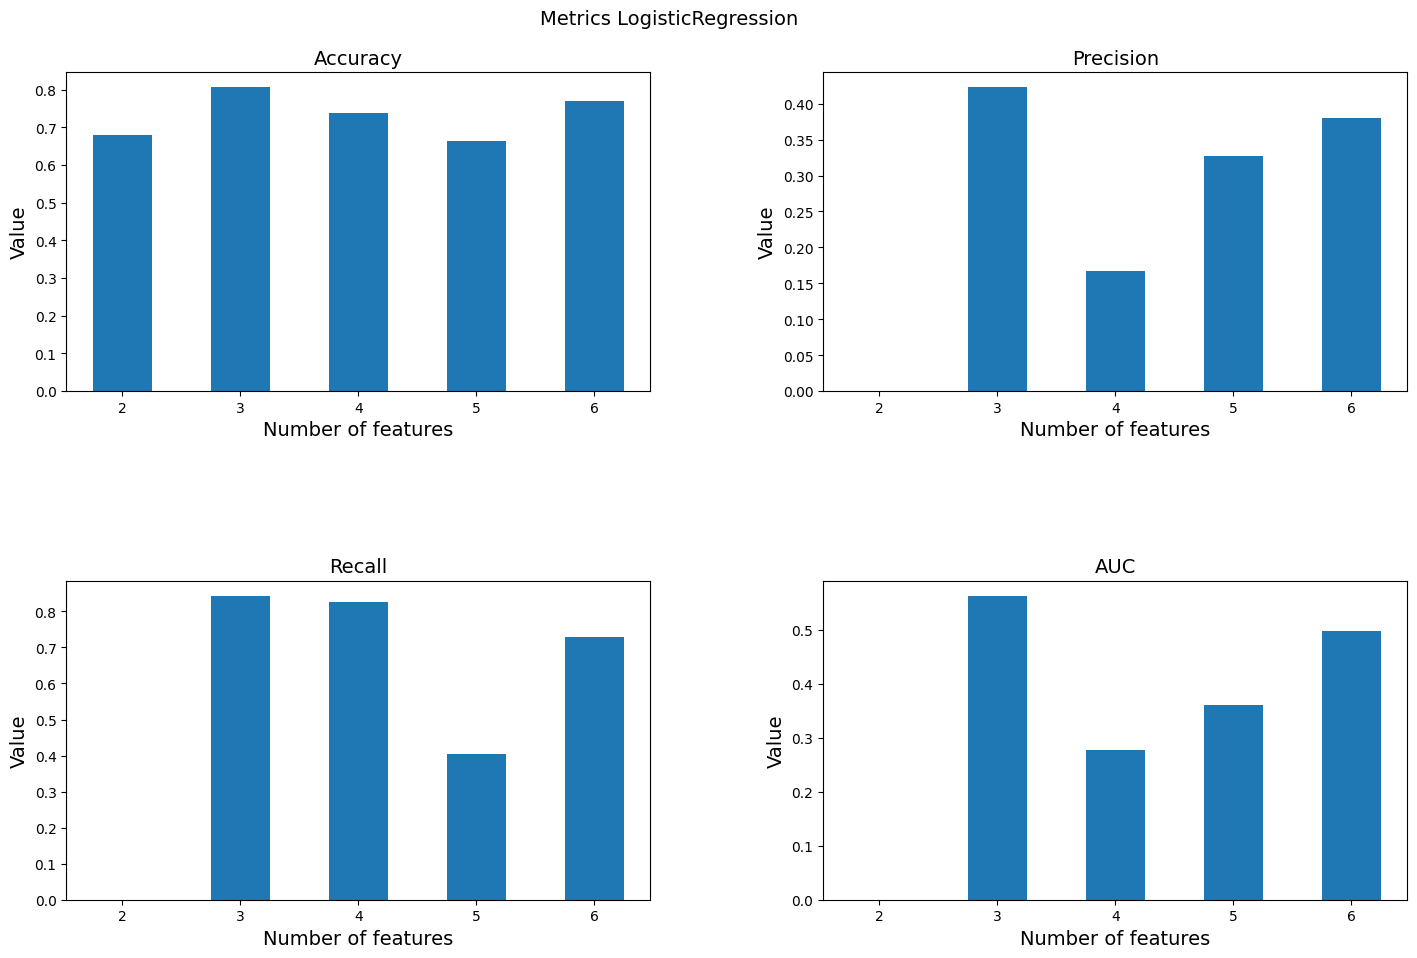

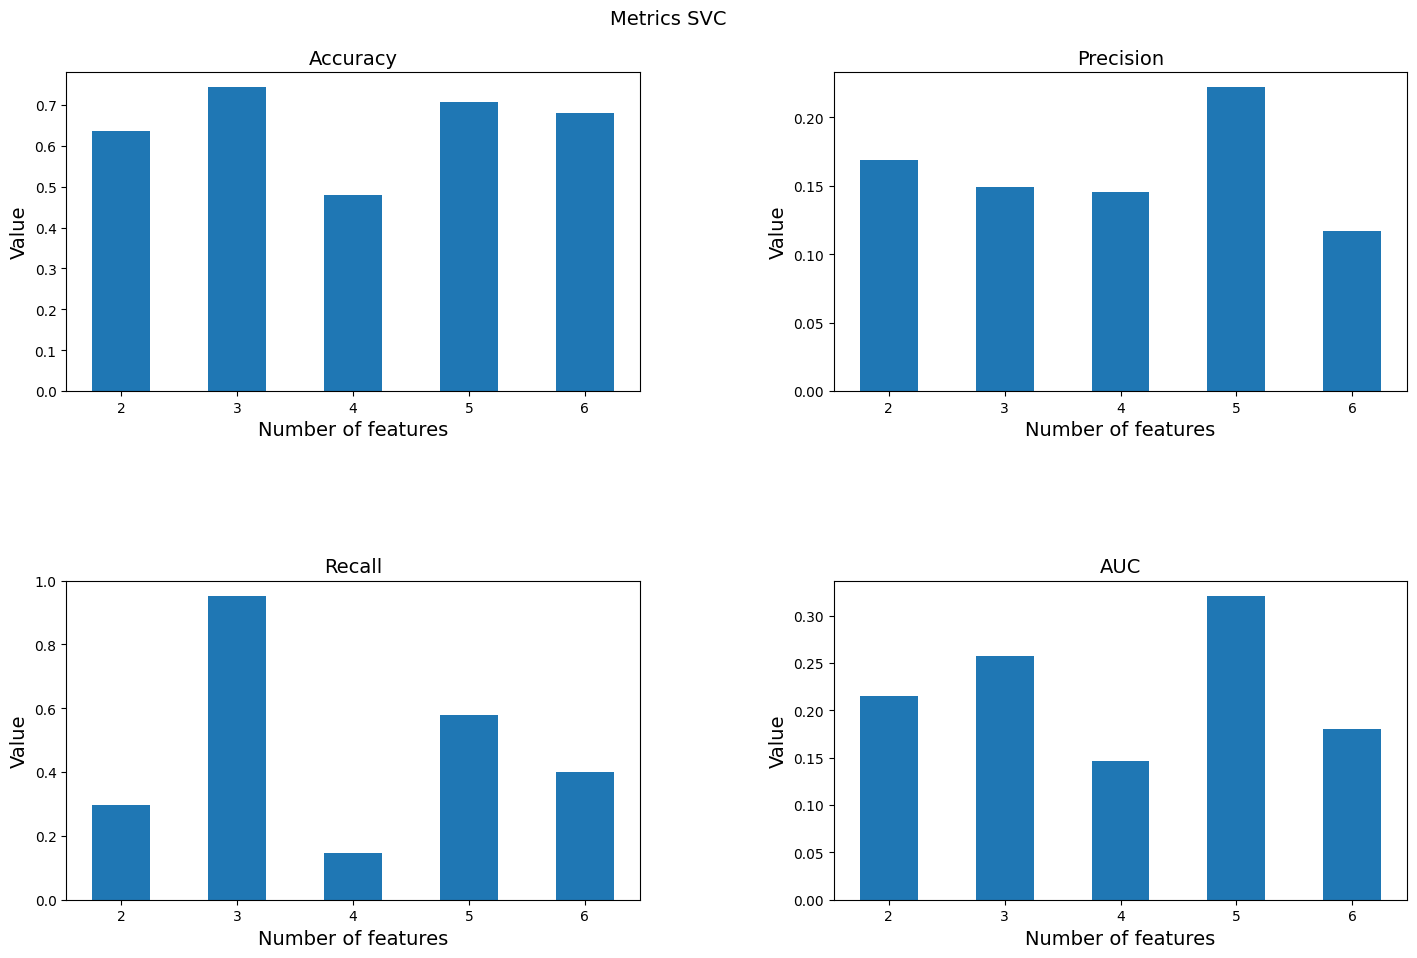

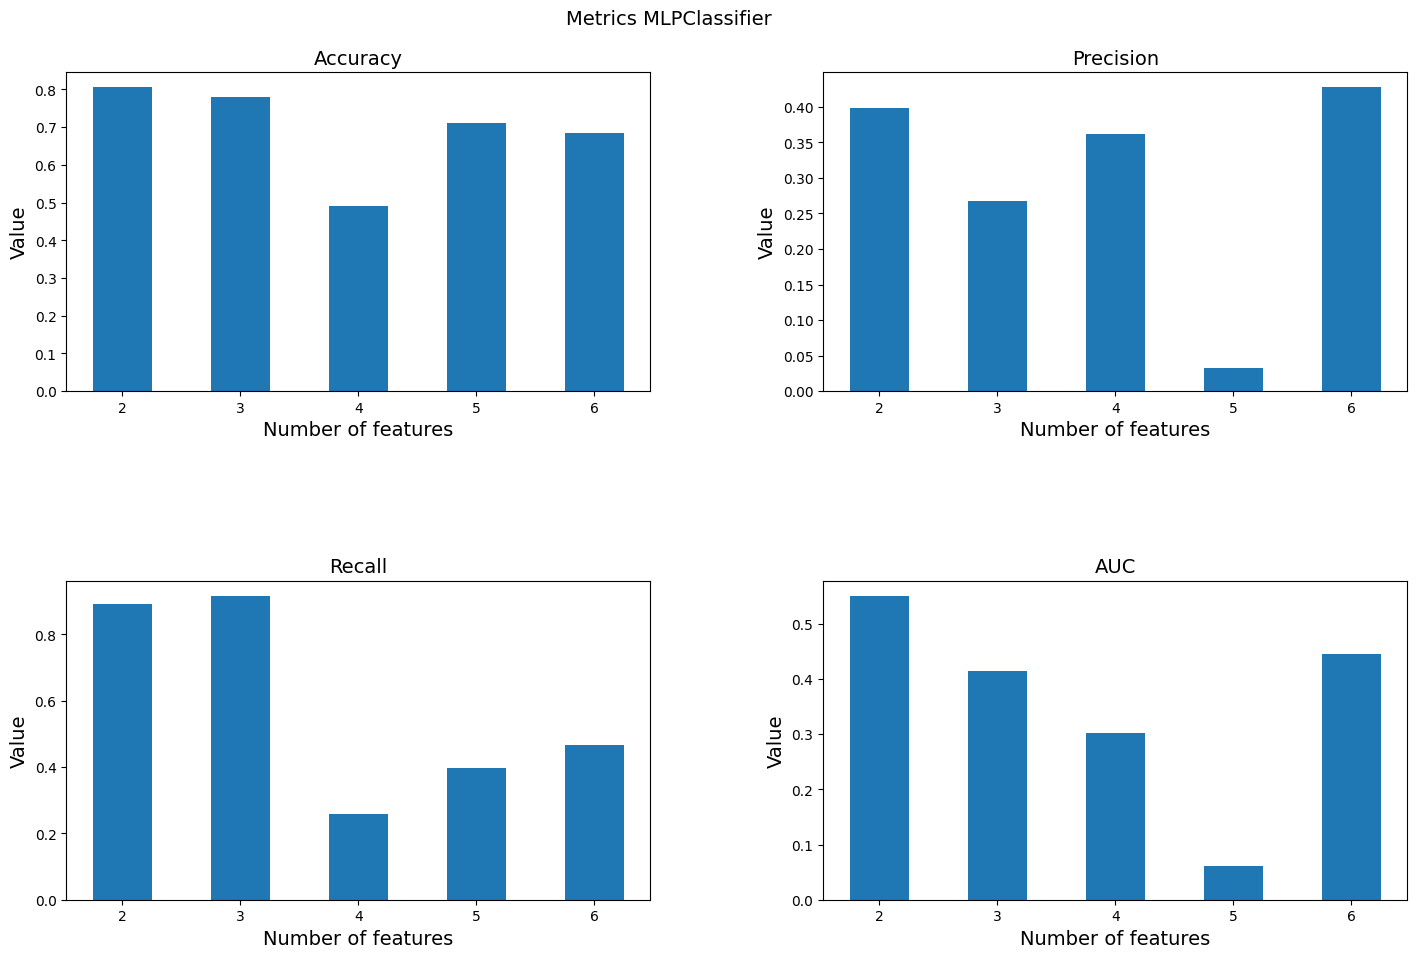

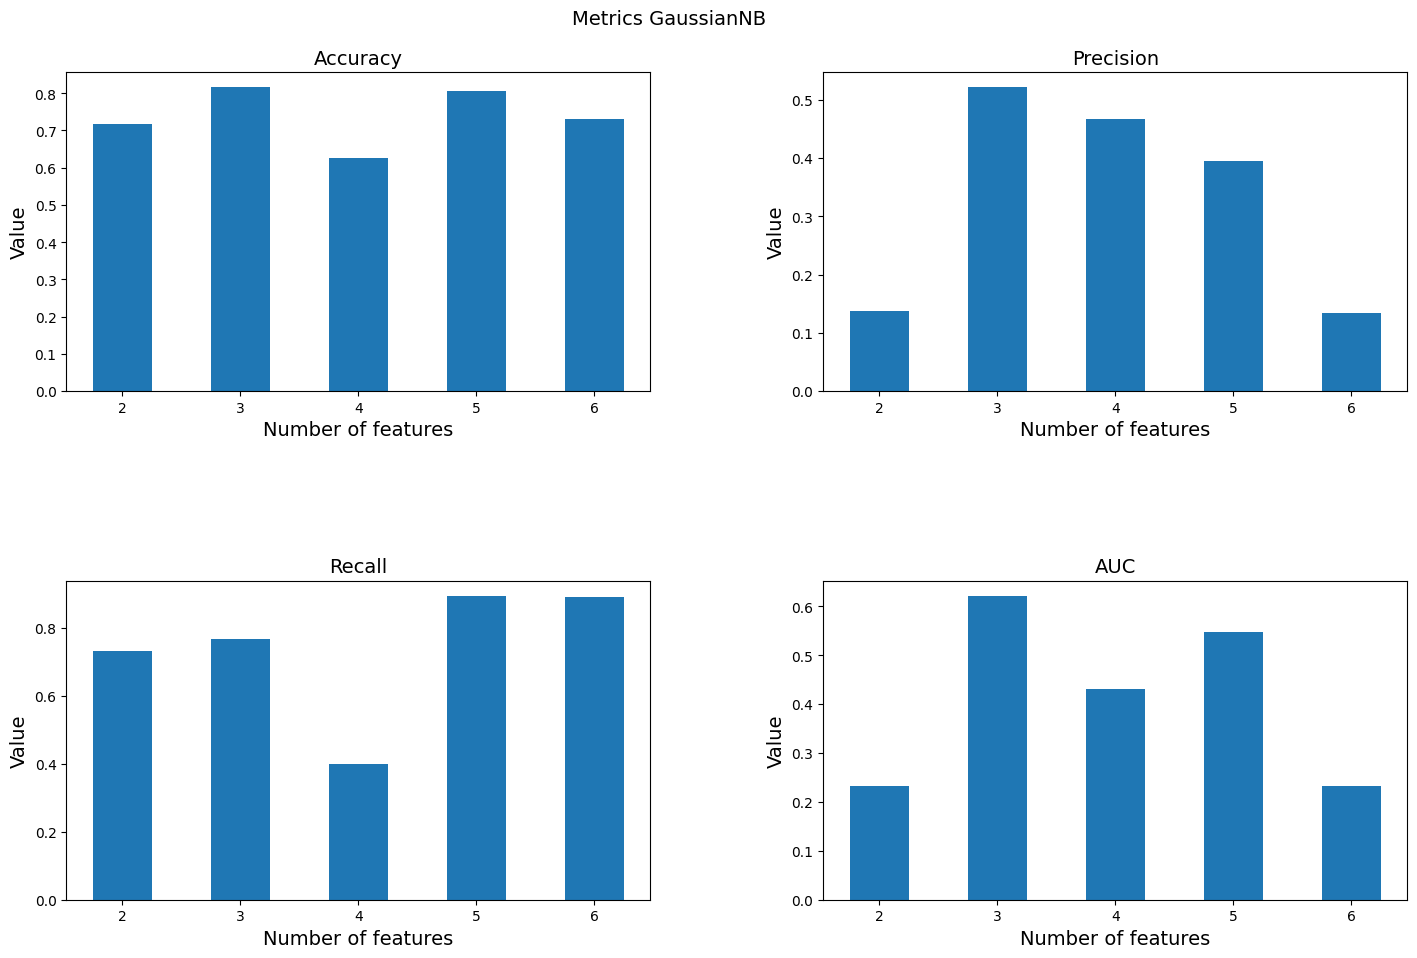

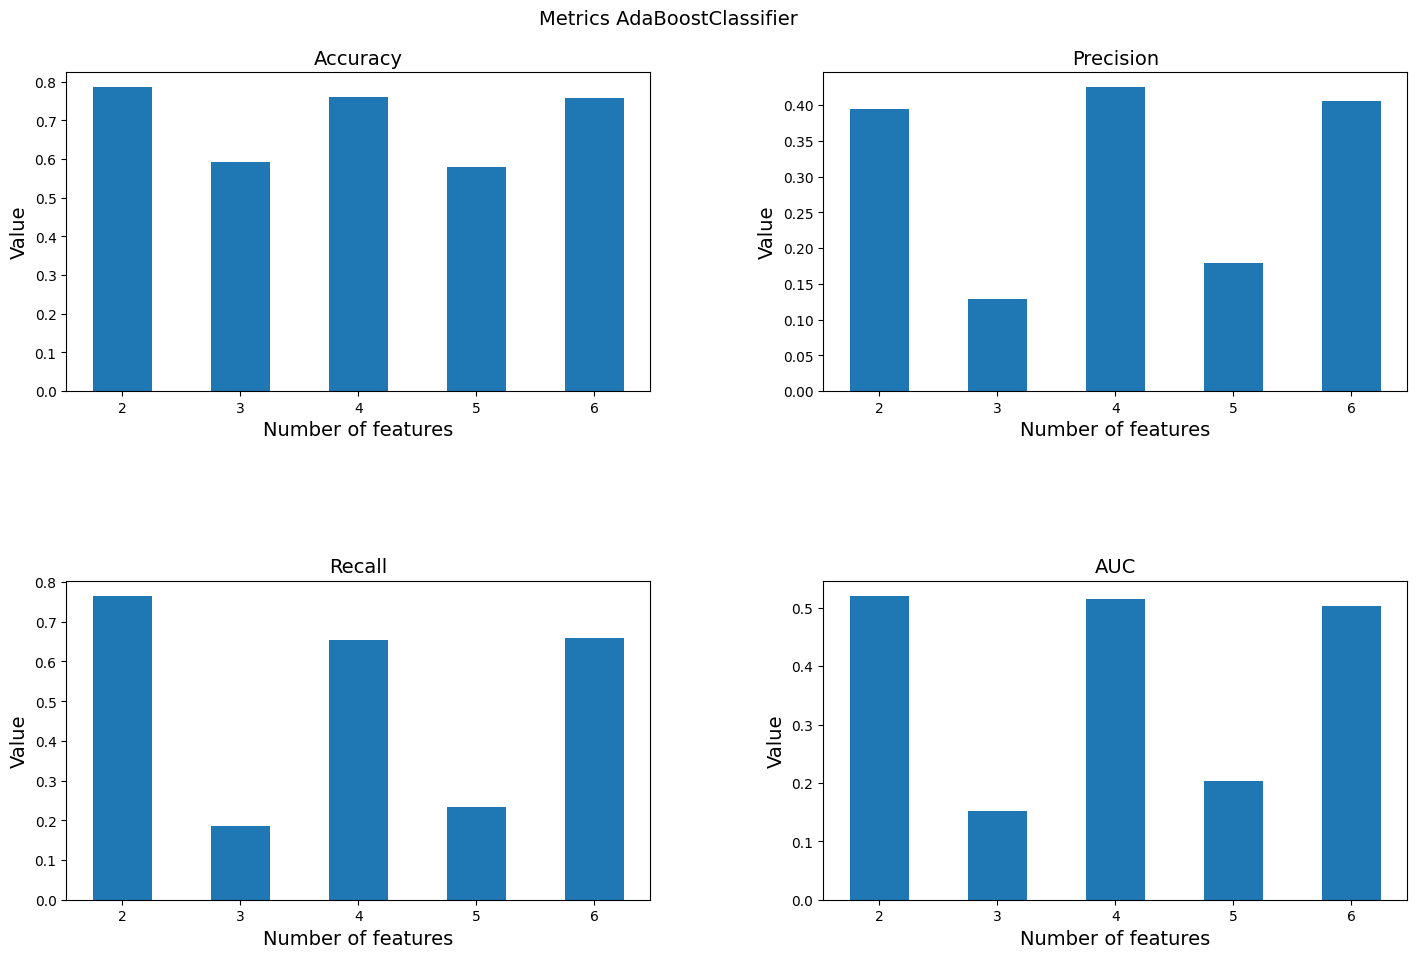

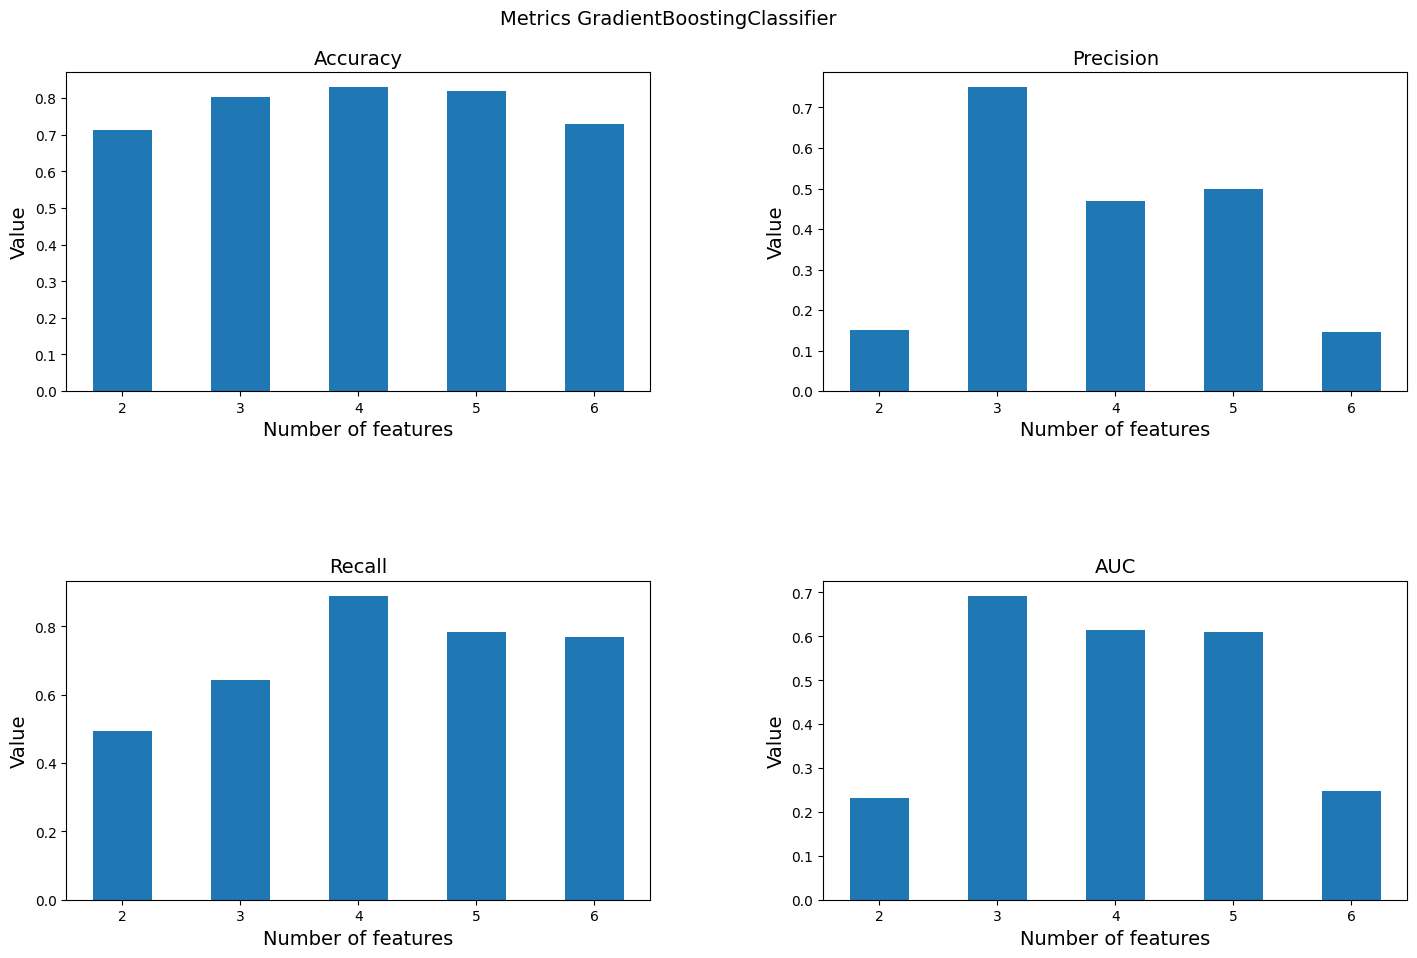

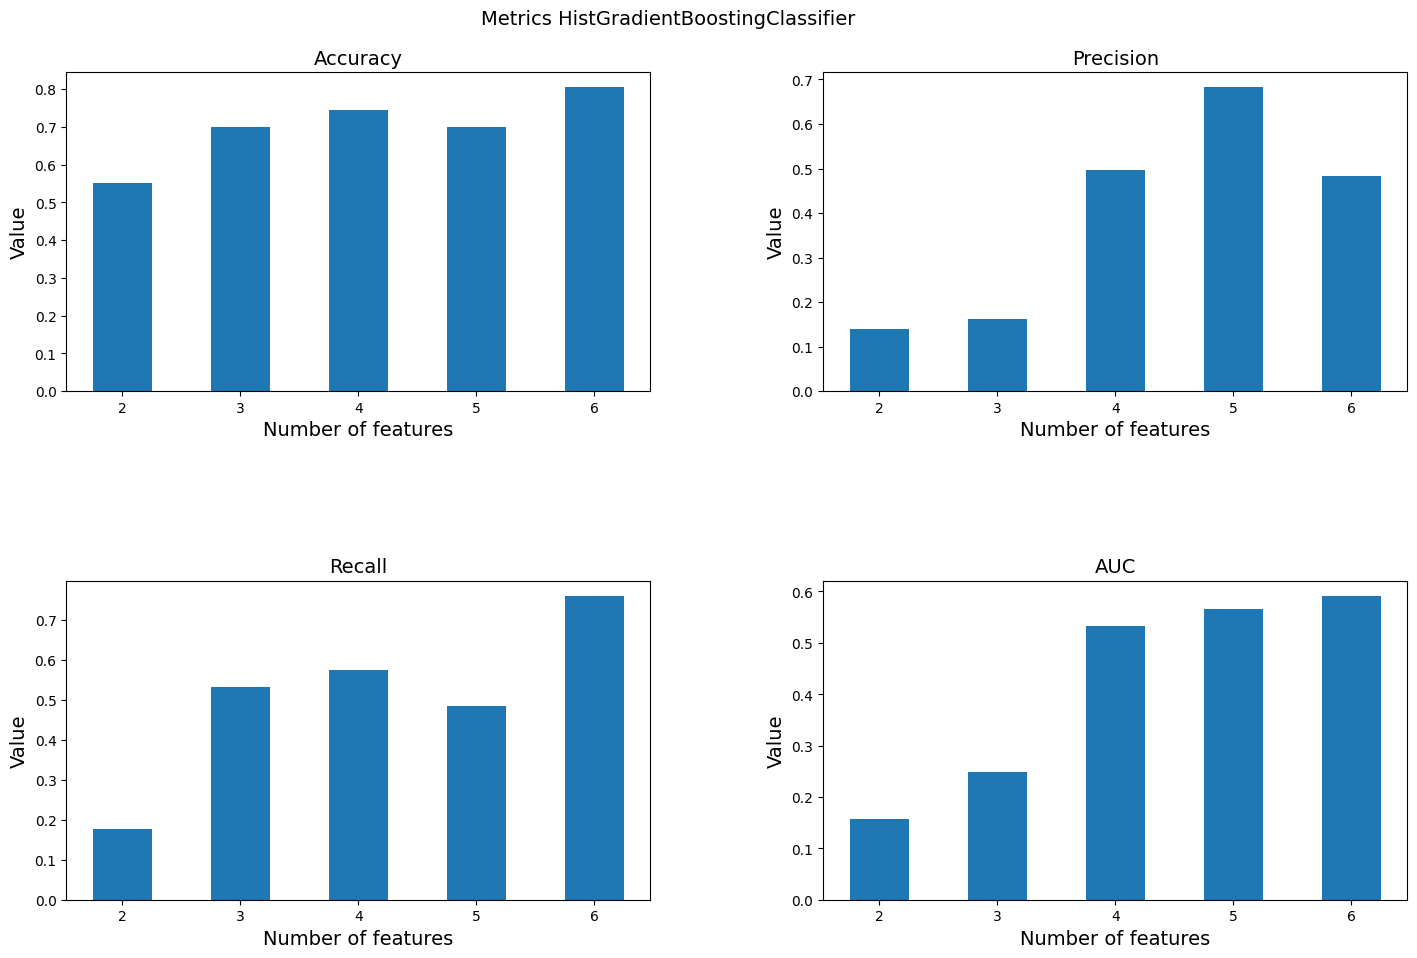

In [105]:
results_by_clf = {}
for clf in clfs:
    results_by_clf[clf] = [result for result in results if result.clf == clf]

    
for clf, result_by_clf in results_by_clf.items():
    clf_name = clf.__class__.__name__

    # Строим график столбцов
    accuracy_values = [result.accuracy for result in result_by_clf]
    precision_values = [result.precision for result in result_by_clf]
    recall_values = [result.recall for result in result_by_clf]
    f1_values = [result.f1 for result in result_by_clf]

    # Добавляем заголовок и подписи осей
    fig, axs = plt.subplots(2, 2)
    
    # Первый график
    axs[0, 0].bar(features_numbers, accuracy_values, width=0.5)
    axs[0, 0].set_title('Accuracy', fontsize=14)
    axs[0, 0].set_xlabel('Number of features', fontsize=14)
    axs[0, 0].set_ylabel('Value', fontsize=14)

    # Второй график
    axs[0, 1].bar(features_numbers, precision_values, width=0.5)
    axs[0, 1].set_title('Precision', fontsize=14)
    axs[0, 1].set_xlabel('Number of features', fontsize=14)
    axs[0, 1].set_ylabel('Value', fontsize=14)

    # Третий график
    axs[1, 0].bar(features_numbers, recall_values, width=0.5)
    axs[1, 0].set_title('Recall', fontsize=14)
    axs[1, 0].set_xlabel('Number of features', fontsize=14)
    axs[1, 0].set_ylabel('Value', fontsize=14)

    # Четвертый график
    axs[1, 1].bar(features_numbers, f1_values, width=0.5)
    axs[1, 1].set_title('F1-score', fontsize=14)
    axs[1, 1].set_xlabel('Number of features', fontsize=14)
    axs[1, 1].set_ylabel('Value', fontsize=14)

    # Настраиваем расположение графиков и добавляем общий заголовок
    fig.tight_layout()
    fig.suptitle(f'Metrics {clf_name}', fontsize=14)

    # Сохраняем график
    fig.set_size_inches(15.5, 10.5, forward=True)
    fig.savefig(f'metrics_clf/Metrics_{clf_name}.png', dpi=300)
    plt.show()

# Plot ROC curves

<Figure size 800x800 with 0 Axes>

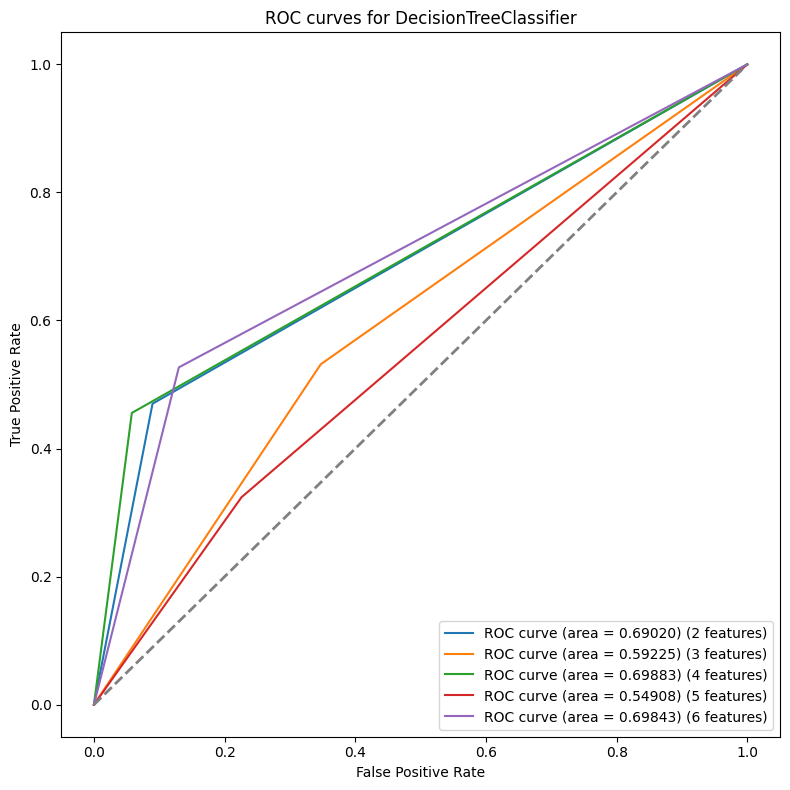

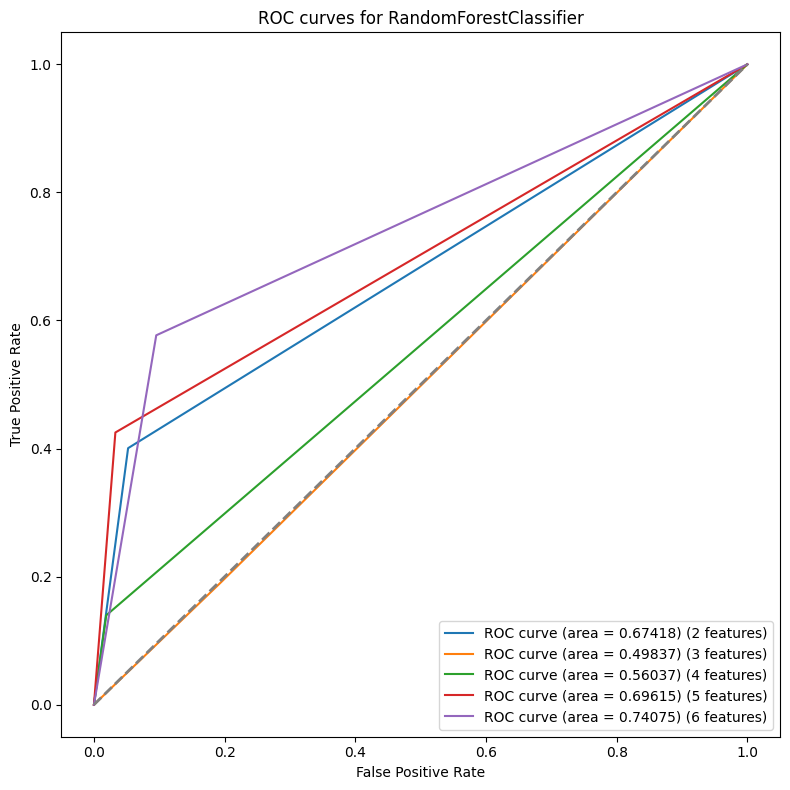

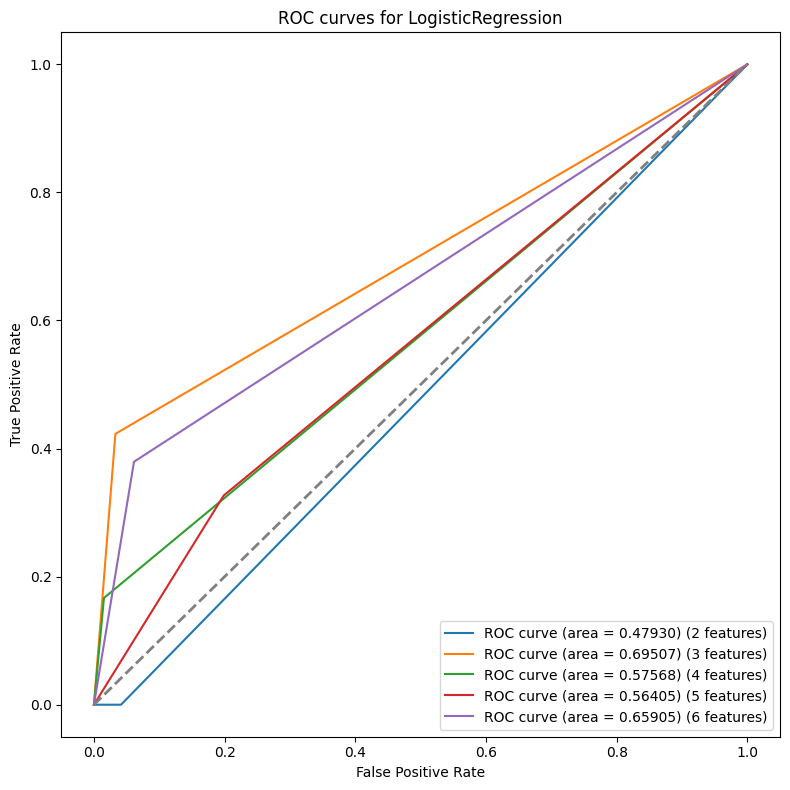

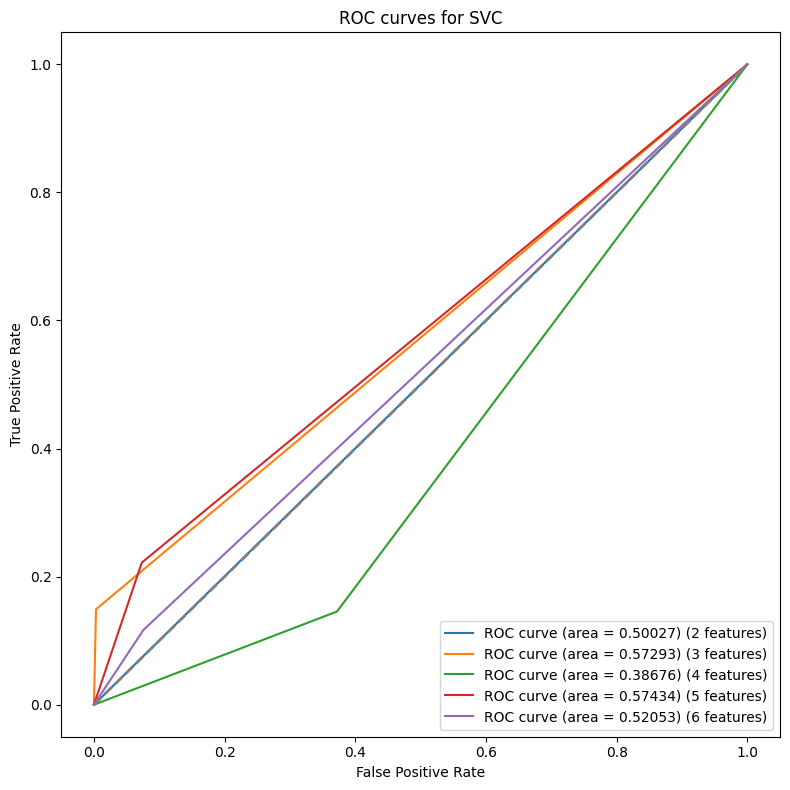

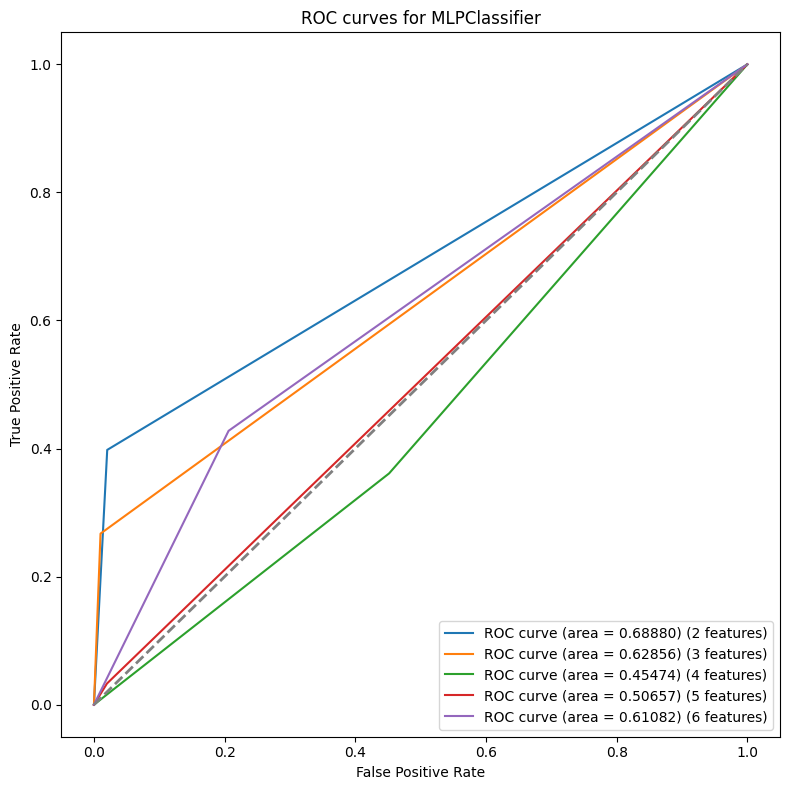

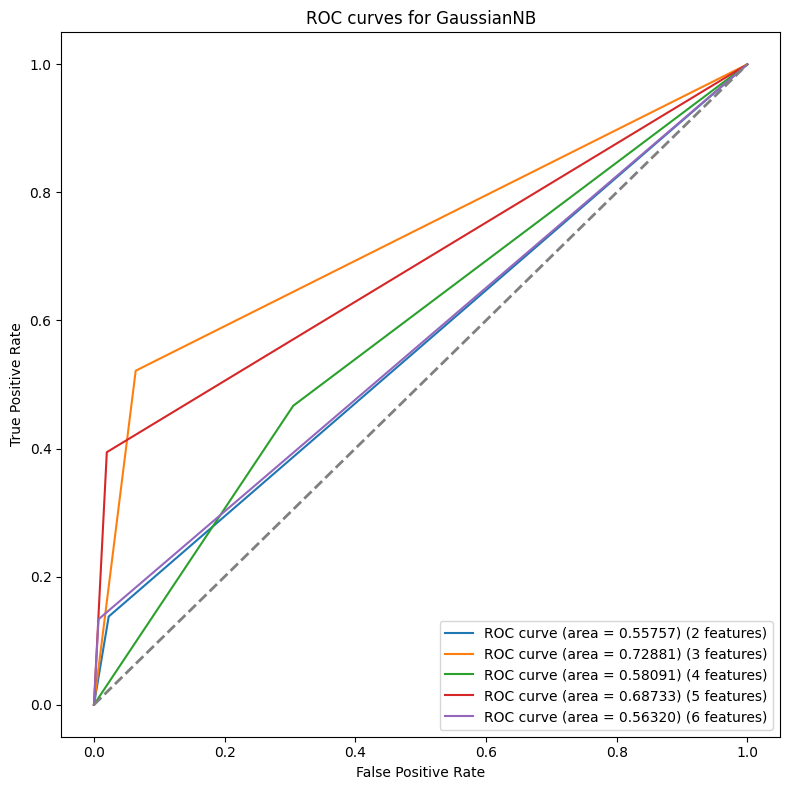

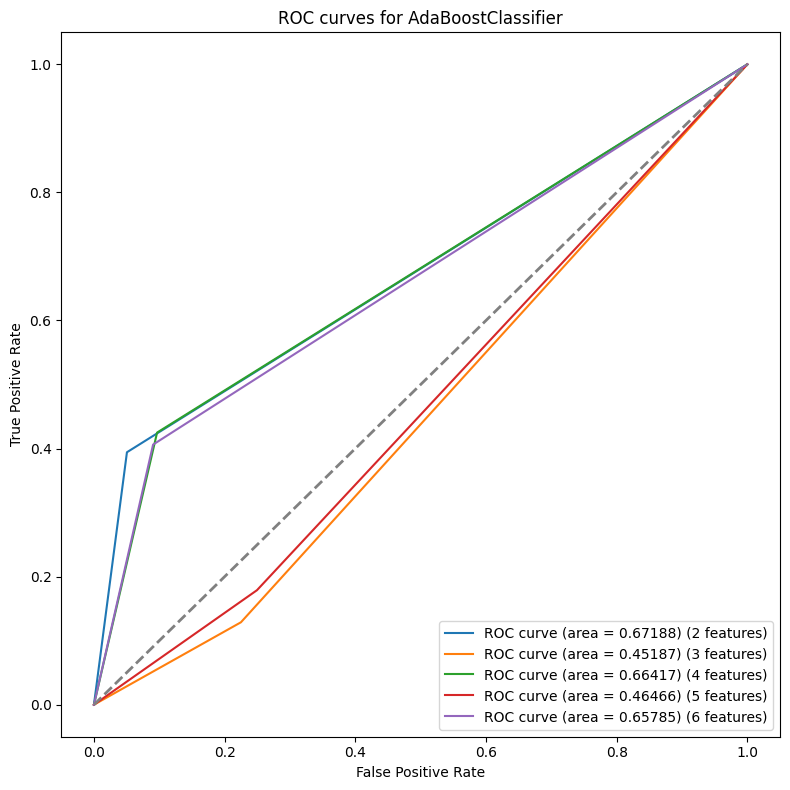

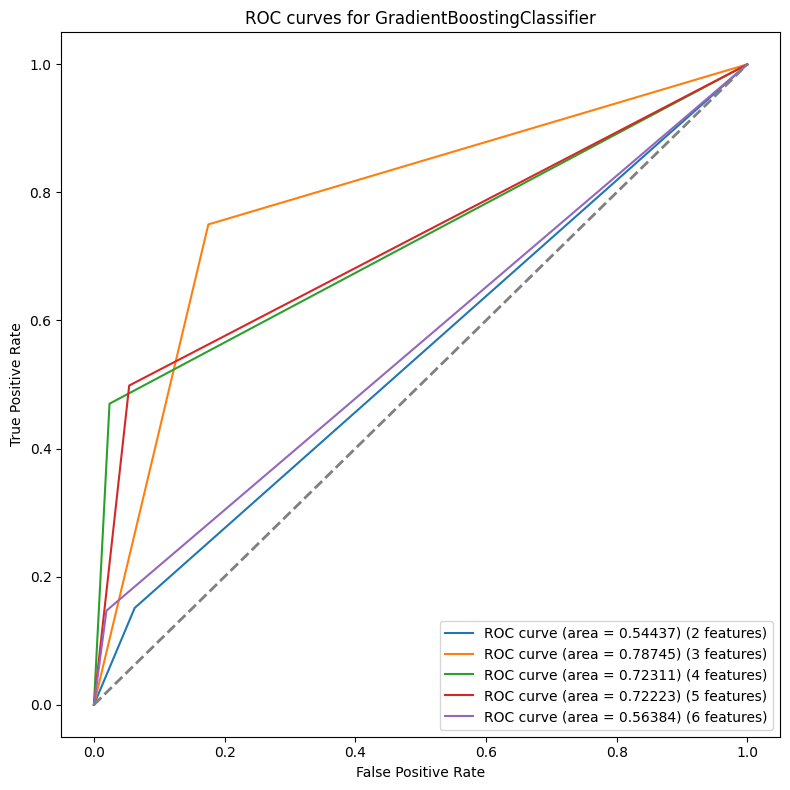

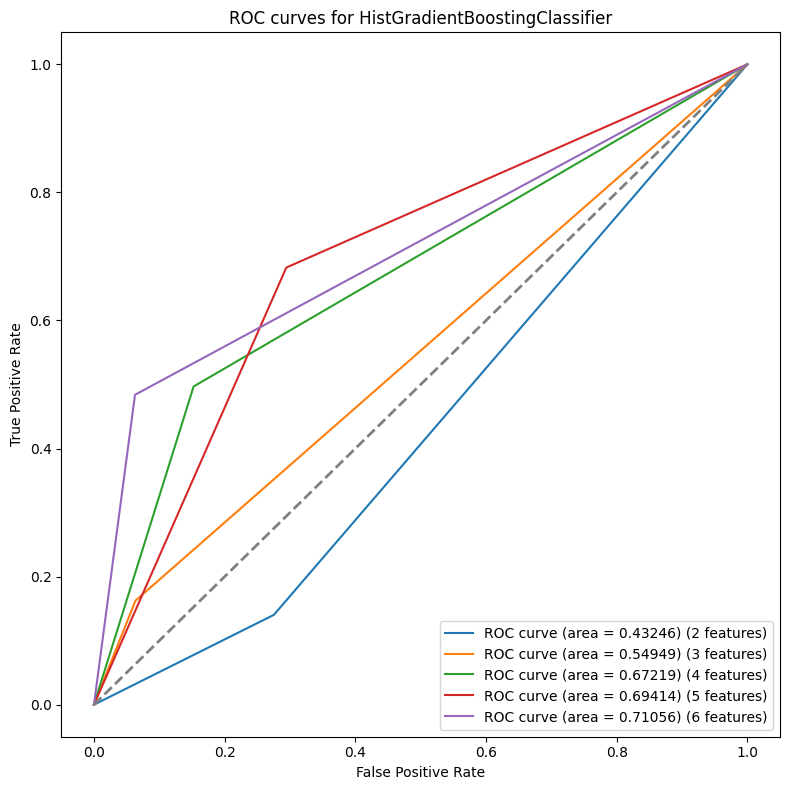

In [106]:
fig = plt.figure(figsize=(8, 8))

# Строим ROC кривые
for clf, result_by_clf in results_by_clf.items():
    fig = plt.figure(figsize=(8, 8))
    clf_name = clf.__class__.__name__
    for i in range(len(result_by_clf)):
        plt.plot(
            result_by_clf[i].fpr,
            result_by_clf[i].tpr,
            label=f'ROC curve (area = %0.5f) ({result_by_clf[i].selected_features_len} features)'% result_by_clf[i].auc
        )

    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curves for {clf_name}')
    plt.legend(loc="lower right")

    # Сохраняем график
    fig.tight_layout()
    plt.savefig(f'ROC_clf/ROC-curves_{clf_name}.png', dpi=300)
    plt.show()